Task-8 Timeline Analysis_Covid-19

Author: Souarv Dey



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [3]:
#Take a look at dataset

df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Data Exploration

In [4]:
#Summarize the data

df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.284710e+05,2.281900e+05,2.269910e+05,2.090700e+05,208973.000000,207788.000000,227430.000000,227149.000000,225955.000000,208042.000000,...,145651.000000,95994.000000,173566.000000,222406.000000,190260.000000,2.414060e+05,8.087000e+03,8087.000000,8116.000000,8087.000000
mean,4.816169e+06,1.216135e+04,1.219014e+04,7.662553e+04,132.349830,132.970221,66014.118025,185.614003,185.975234,717.016426,...,32.815032,50.892178,3.088089,73.611310,0.724676,1.408195e+08,4.977151e+04,10.085970,14.215795,1411.092772
std,2.990623e+07,8.383495e+04,8.184132e+04,3.923720e+05,711.087906,696.778172,114649.859673,1158.427892,686.513003,998.806006,...,13.536870,31.873532,2.551368,7.446572,0.149599,6.924796e+08,1.370660e+05,13.403121,26.063144,1778.219605
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281517
25%,5.001000e+03,0.000000e+00,5.429000e+00,1.180000e+02,0.000000,0.000000,1190.421750,0.000000,1.153000,31.916000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.367830e+05,5.320000e+01,0.740000,0.030000,37.336276
50%,5.589900e+04,4.600000e+01,8.700000e+01,1.269000e+03,1.000000,1.286000,11663.618500,6.237000,17.800000,226.603000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.301800e+03,7.640000,7.415000,852.109416
75%,5.760470e+05,9.050000e+02,1.079286e+03,1.040400e+04,13.000000,14.714000,78857.822750,91.640000,130.777500,1065.835250,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.612080e+04,15.770000,19.392500,2261.224282
max,6.503303e+08,4.083954e+06,3.439393e+06,6.656214e+06,17733.000000,14859.286000,694304.844000,228872.025000,36421.827000,6393.734000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.240683e+06,76.550000,376.710000,10032.844512


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242447 entries, 0 to 242446
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    242447 non-null  object 
 1   continent                                   228812 non-null  object 
 2   location                                    242447 non-null  object 
 3   date                                        242447 non-null  object 
 4   total_cases                                 228471 non-null  float64
 5   new_cases                                   228190 non-null  float64
 6   new_cases_smoothed                          226991 non-null  float64
 7   total_deaths                                209070 non-null  float64
 8   new_deaths                                  208973 non-null  float64
 9   new_deaths_smoothed                         207788 non-null  float64
 

droping the Duplicates rows

In [6]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 67)


In [7]:
df.count() #Used to count the number of rows

iso_code                                   242447
continent                                  228812
location                                   242447
date                                       242447
total_cases                                228471
                                            ...  
population                                 241406
excess_mortality_cumulative_absolute         8087
excess_mortality_cumulative                  8087
excess_mortality                             8116
excess_mortality_cumulative_per_million      8087
Length: 67, dtype: int64

In [8]:
#Checking the Missing or Null values
print(df.isnull().sum())

iso_code                                        0
continent                                   13635
location                                        0
date                                            0
total_cases                                 13976
                                            ...  
population                                   1041
excess_mortality_cumulative_absolute       234360
excess_mortality_cumulative                234360
excess_mortality                           234331
excess_mortality_cumulative_per_million    234360
Length: 67, dtype: int64


In [9]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]

df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [10]:
df1.date = pd.to_datetime(df.date)

df1.set_index('date', inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df1.head()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-02-24,5.0,5.0,NaN,NaN,NaN
2020-02-25,5.0,0.0,NaN,NaN,NaN
2020-02-26,5.0,0.0,NaN,NaN,NaN
2020-02-27,5.0,0.0,NaN,NaN,NaN
2020-02-28,5.0,0.0,NaN,NaN,NaN


Text(0.5, 0, 'Month')

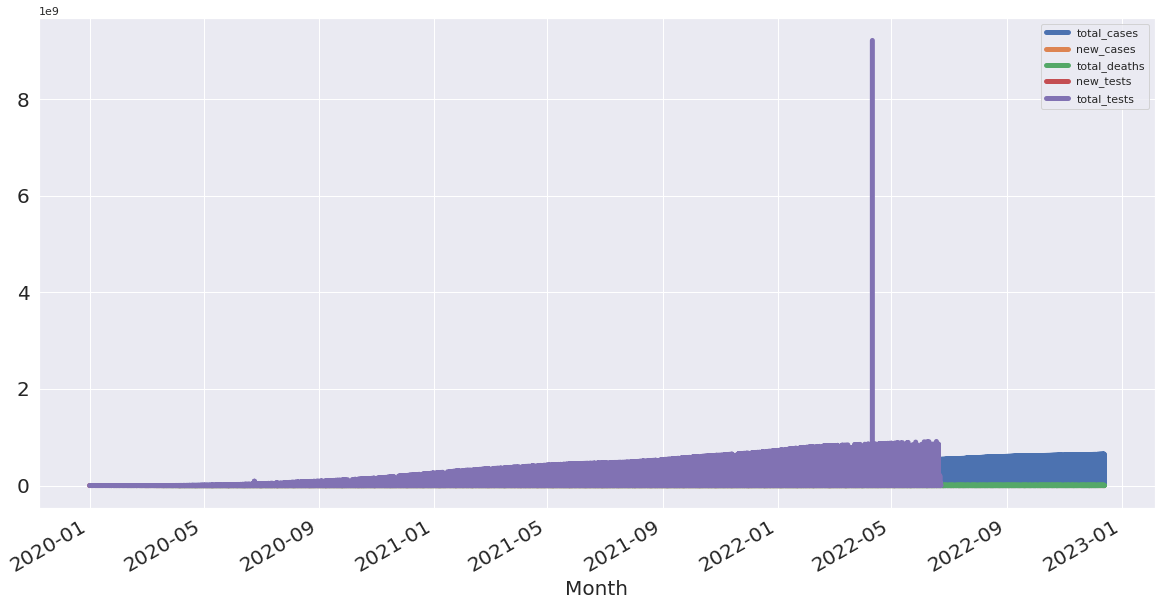

In [12]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

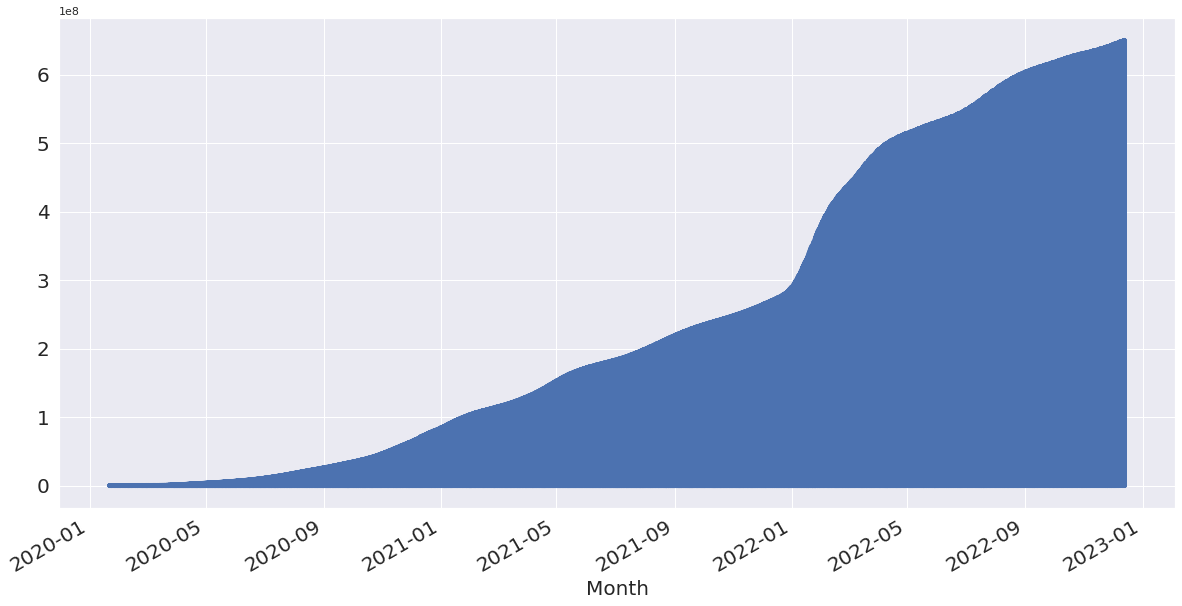

In [13]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

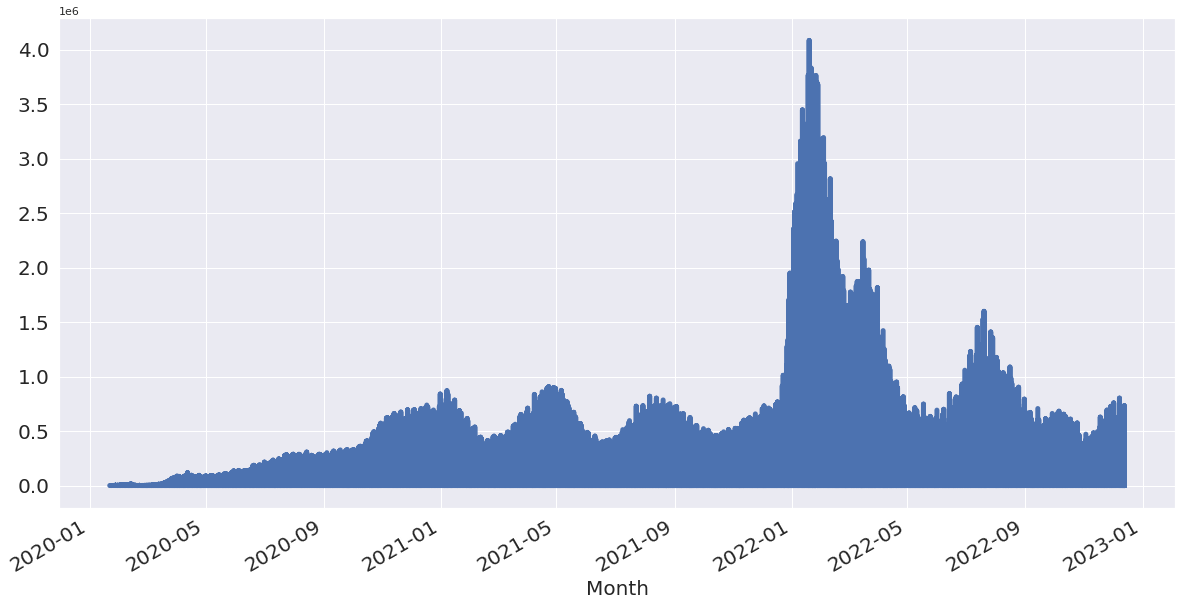

In [14]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Trends and Seasonality in TimeSeries Data

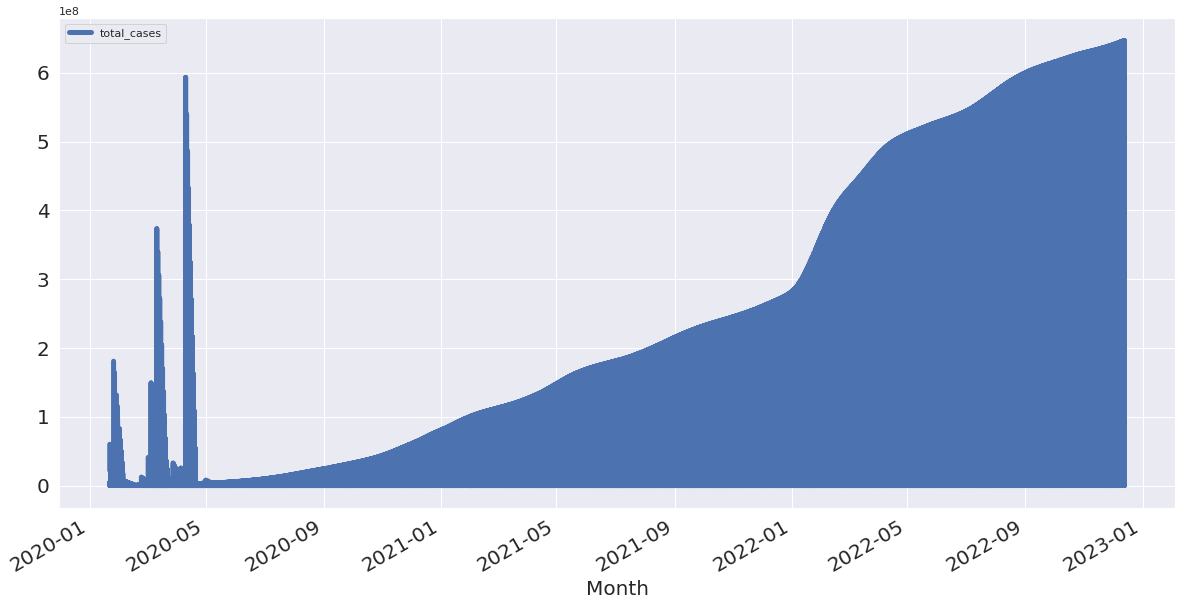

In [15]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

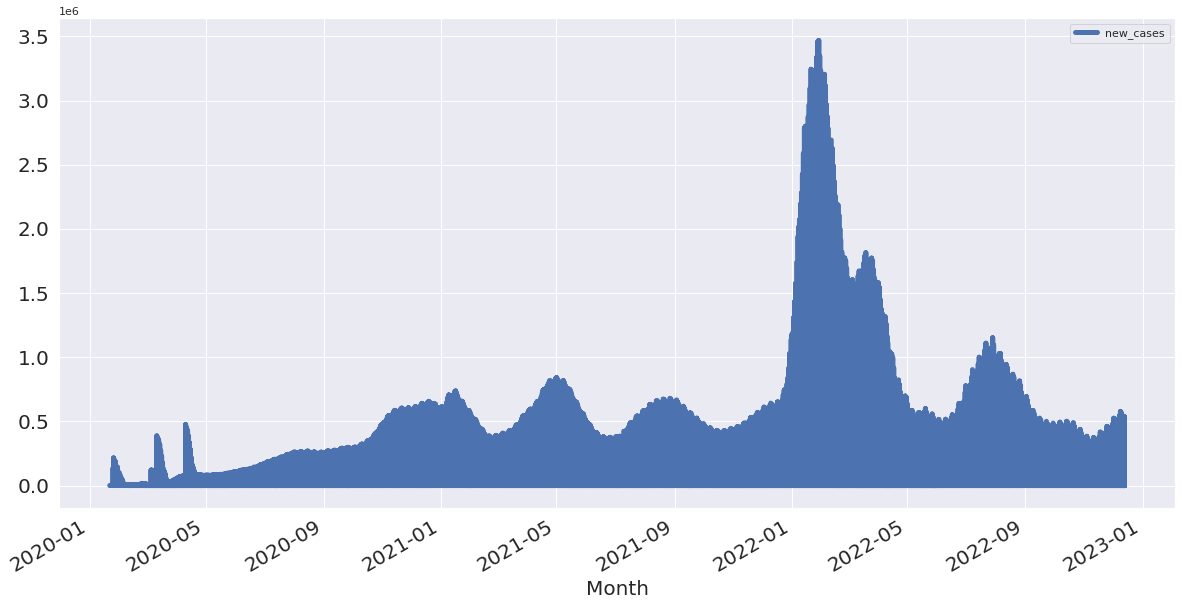

In [16]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

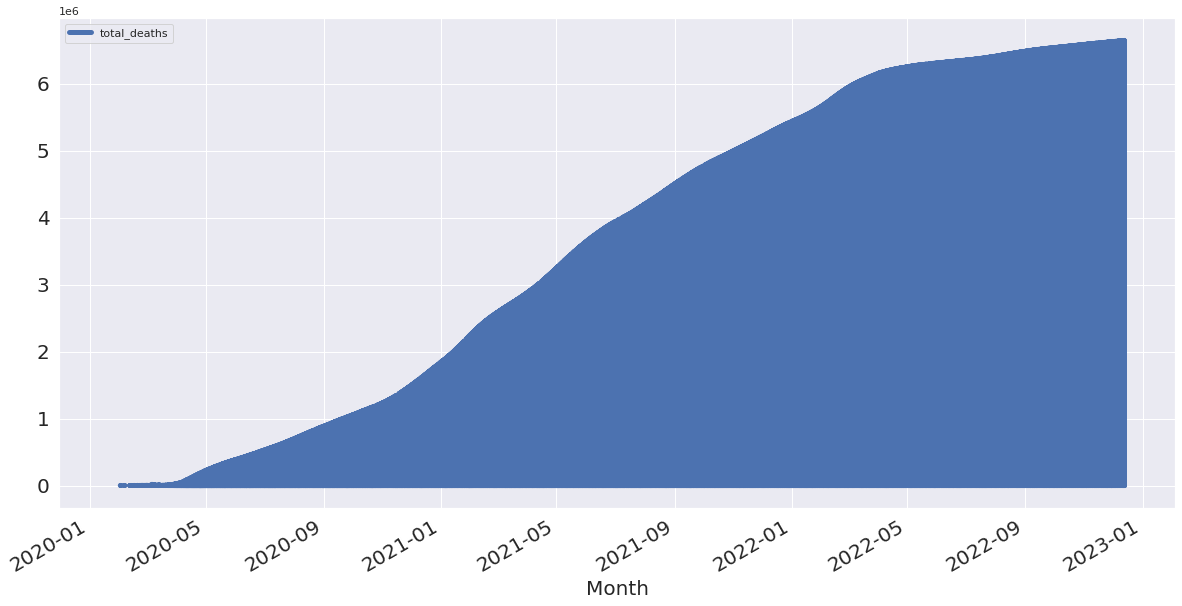

In [17]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

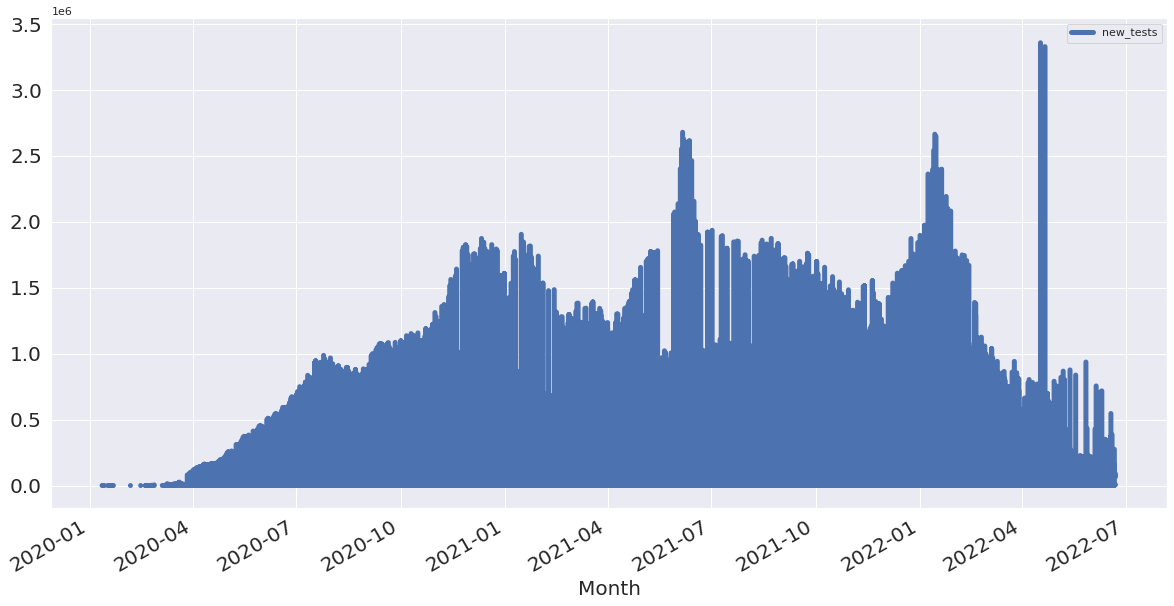

In [18]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

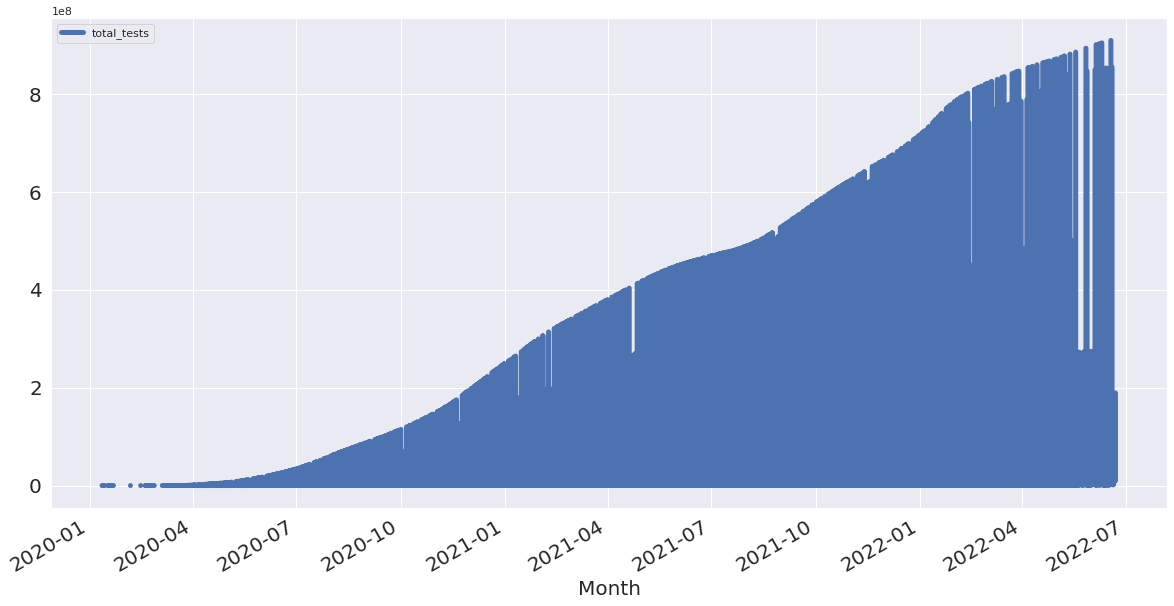

In [19]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

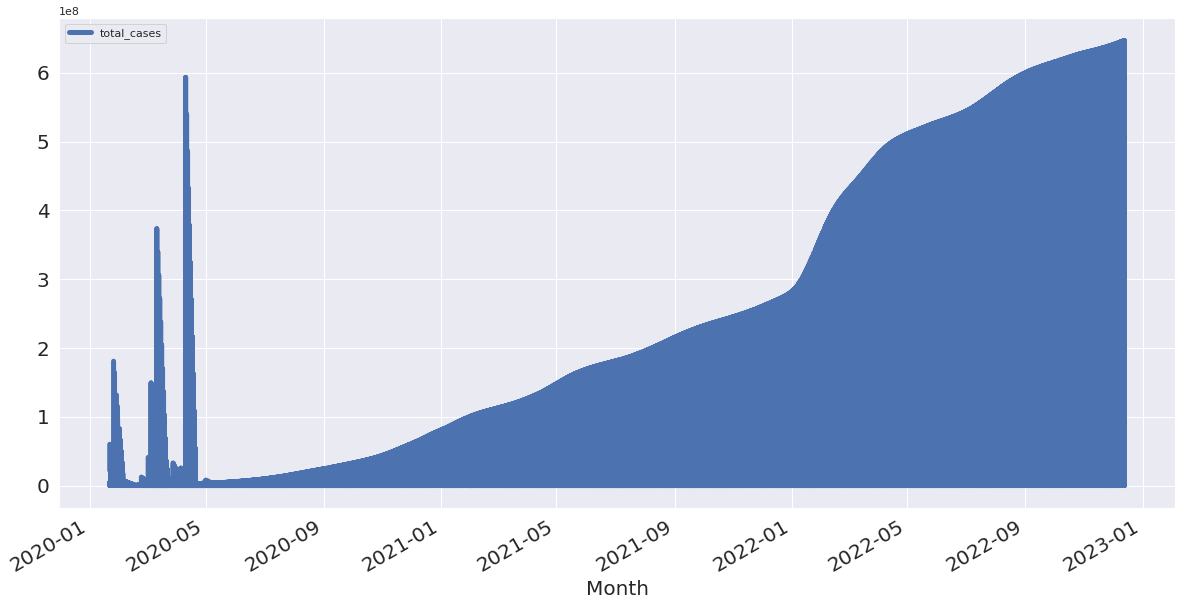

In [20]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

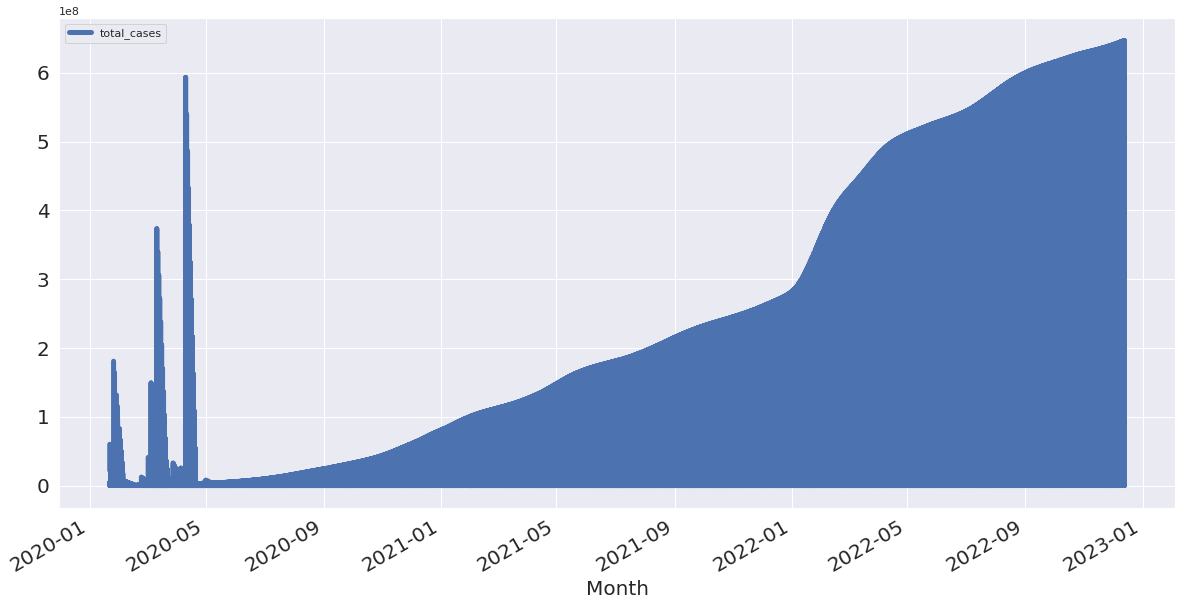

In [21]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

Seasonal Patterns in Time Series Data

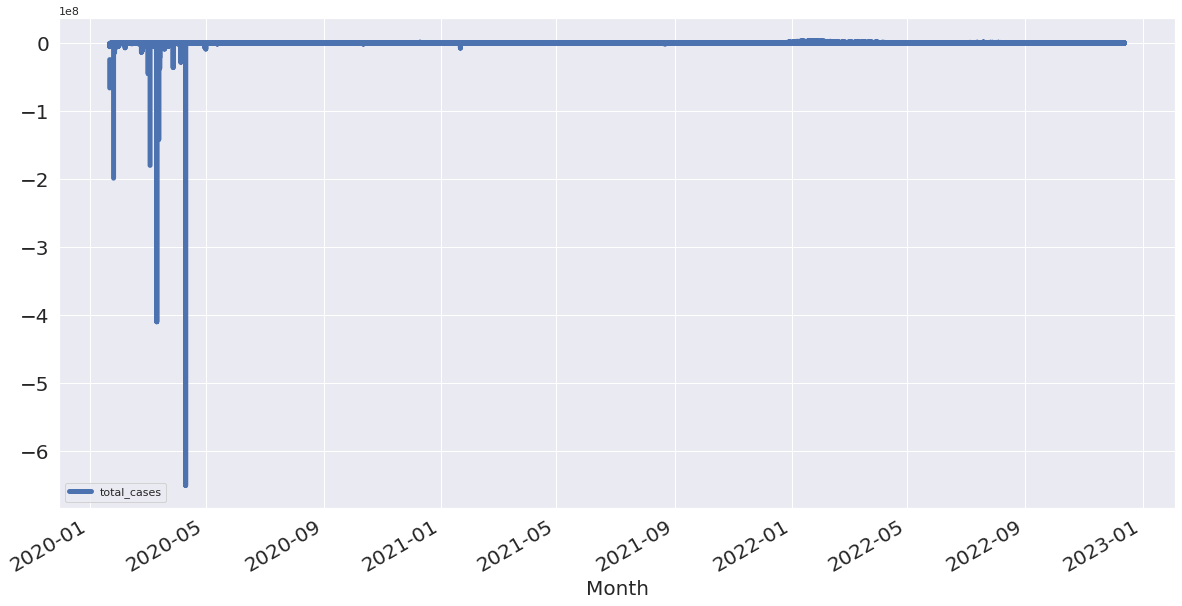

In [22]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);